<h2> Building a maultivariable regressor using crime data in New York State in 2013 and 2014, provided by the FBI: UCR.
Train, Test and Validate</h2> 

In [109]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
import sklearn.metrics as sm 
from sklearn.preprocessing import PolynomialFeatures 

In [110]:
# Grab and process the cleaned data
path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/NY Crime/NY_Crime_2013_2014_cleaned.csv")
df_import = pd.read_csv(path1)

In [111]:
df_import.dtypes

yr           int64
City        object
prop         int64
pop          int64
murd         int64
rob          int64
violent      int64
assul        int64
burg         int64
theft        int64
motor        int64
pop_log    float64
dtype: object

In [112]:
cols1 = [col for col in df_import.columns if col not in ['yr','pop','City']]

In [114]:
df_main = df_import[cols1].astype('float64')

In [116]:
df_main.head(3)

,prop,murd,rob,violent,assul,burg,theft,motor,pop_log
0,12.0,0.0,0.0,0.0,0.0,2.0,10.0,0.0,7.528869
1,24.0,0.0,0.0,3.0,3.0,3.0,20.0,1.0,7.854381
2,16.0,0.0,0.0,3.0,3.0,1.0,15.0,0.0,7.953670


In [117]:
# Check to see if any missing data 
df_main.isnull().sum()

prop       0
murd       0
rob        0
violent    0
assul      0
burg       0
theft      0
motor      0
pop_log    0
dtype: int64

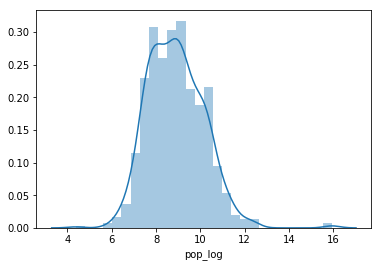

In [118]:
sns.distplot(df_main['pop_log']);

<h2> Train, validation and test data </h2>

In [119]:
from sklearn.model_selection import train_test_split        

def data_split(df_main,trf = 0.5,vlf=0.25,tsf = 0.25): 
    nrows = df_main.shape[0] 
    trnr = int(nrows*trf)
    vlnr = int(nrows*vlf) 
    
# Break the data into training and remaning
    tr_data,rmng = train_test_split(df_main,train_size = trnr,random_state=40)
    vl_data, ts_data = train_test_split(rmng,train_size = vlnr,random_state=43)
    return (tr_data,vl_data,ts_data) 

train_data, validation_data, test_data = data_split (df_main ,trf=0.5, vlf=0.25, tsf=0.25) 

# Propertycrime = α + Population + Population2 + Murder + Robbery + etc.

cols_X = [col for col in df_main.columns if col not in ['prop']]

X_train_data = train_data.loc[:,cols_X].copy()
X_validation_data = validation_data.loc[:,cols_X].copy()
X_test_data = test_data.loc[:,cols_X].copy()

y_train_data = train_data.loc[:,'prop'].copy()
y_validation_data = validation_data.loc[:,'prop'].copy()
y_test_data = test_data.loc[:,'prop'].copy()



C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [120]:
X_test = train_data.loc[:,cols_X].copy()
y_test = train_data.loc[:,cols_X].copy()
y_train = train_data.loc[:,'prop'].copy()
y_test = train_data.loc[:,'prop'].copy()

In [127]:
import statsmodels.api as sm
sm_OLS_test = sm.OLS(y_train_data, X_train_data) 

In [128]:
full_res = sm_OLS_test.fit() 
print ("\n \n",full_res.summary()) 


 
                             OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.503e+29
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:19:58   Log-Likelihood:                 7529.2
No. Observations:                 358   AIC:                        -1.504e+04
Df Residuals:                     350   BIC:                        -1.501e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
murd       -3.268e-13   1.39e-11     -0.024     

R^2 = 1 is sign of overfitting.

Based on t values of murd and rob we need to rerun this model by elimianting these two features, one by one.

Also look at the Durbin-Watson test. Durbin-Watson's d tests the null hypothesis that the residuals are not linearly auto correlated. While d can lie between 0 and 4, if d ≈ 2 indicates no autocorrelation, 0<d<2 implies positive autocorrelation, and 2<d<4 indicates negative autocorrelation.

In [129]:
predictions = full_res.predict(X_test_data)

In [130]:
type(predictions)

pandas.core.series.Series

In [131]:
residual = y_test_data - predictions

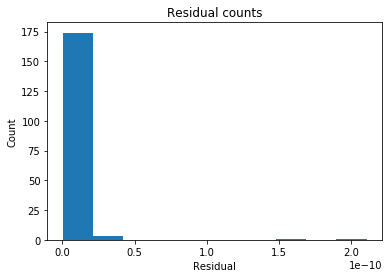

In [132]:
# Outliers or skewness in error 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

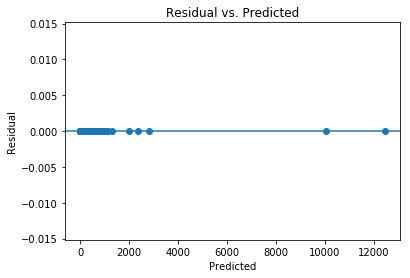

In [133]:
# The distribution of error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic
plt.scatter(predictions, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

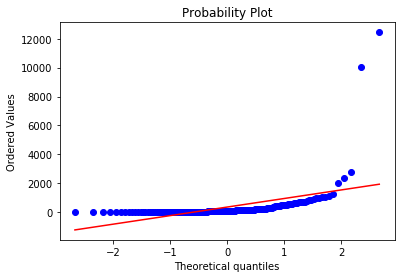

In [134]:
import numpy as np 
import pylab
import scipy.stats as stats

#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(predictions, dist="norm", plot=pylab)
pylab.show()

<h1> Rerun the model by eliminating murd because of highest p value</h1>

In [171]:
# Grab and process the cleaned data
path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/NY Crime/NY_Crime_2013_2014_cleaned.csv")
df_import = pd.read_csv(path1)

In [172]:
cols1 = [col for col in df_import.columns if col not in ['yr','pop', 'murd','City']]

In [189]:
df_main = df_import[cols1].astype('float64')

<h2> Train, validation and test data </h2>

In [190]:
from sklearn.model_selection import train_test_split        

def data_split(df_main,trf = 0.5,vlf=0.25,tsf = 0.25): 
    nrows = df_main.shape[0] 
    trnr = int(nrows*trf)
    vlnr = int(nrows*vlf) 
    
# Break the data into training and remaning
    tr_data,rmng = train_test_split(df_main,train_size = trnr,random_state=40)
    vl_data, ts_data = train_test_split(rmng,train_size = vlnr,random_state=43)
    return (tr_data,vl_data,ts_data) 

train_data, validation_data, test_data = data_split (df_main ,trf=0.5, vlf=0.25, tsf=0.25) 

# Propertycrime = α + Population + Population2 + Murder + Robbery + etc.

cols_X = [col for col in df_main.columns if col not in ['prop']]

X_train_data = train_data.loc[:,cols_X].copy()
X_validation_data = validation_data.loc[:,cols_X].copy()
X_test_data = test_data.loc[:,cols_X].copy()

y_train_data = train_data.loc[:,'prop'].copy()
y_validation_data = validation_data.loc[:,'prop'].copy()
y_test_data = test_data.loc[:,'prop'].copy()



C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [191]:
X_test = train_data.loc[:,cols_X].copy()
y_test = train_data.loc[:,cols_X].copy()
y_train = train_data.loc[:,'prop'].copy()
y_test = train_data.loc[:,'prop'].copy()

In [192]:
import statsmodels.api as sm
sm_OLS_test = sm.OLS(y_train_data, X_train_data) 

In [193]:
full_res = sm_OLS_test.fit() 
print ("\n \n",full_res.summary()) 


 
                             OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.429e+30
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:41:21   Log-Likelihood:                 8101.2
No. Observations:                 358   AIC:                        -1.619e+04
Df Residuals:                     354   BIC:                        -1.618e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
burg           1.0000   1.71e-14   5.84e+13     

R^2 = 1 is sign of overfitting.

Based on t values of murd and rob we need to rerun this model by elimianting these two features, one by one.

Also look at the Durbin-Watson test. Durbin-Watson's d tests the null hypothesis that the residuals are not linearly auto correlated. While d can lie between 0 and 4, if d ≈ 2 indicates no autocorrelation, 0<d<2 implies positive autocorrelation, and 2<d<4 indicates negative autocorrelation.

<h1> Try different holdout ratio and also eliminate more features with highest p values </h1>

In [195]:
# Grab and process the cleaned data
path1 = ("C:/Users/aath/Dropbox/MAEN/Thankful/Data/NY Crime/NY_Crime_2013_2014_cleaned.csv")
df_import = pd.read_csv(path1)

In [202]:
cols1 = [col for col in df_import.columns if col not in ['yr','pop','City', 'murd','rob', 'violent', 'assul', 'pop_log']]

In [203]:
df_main = df_import[cols1].astype('float64')

<h2> Train, validation and test data </h2>

In [224]:
from sklearn.model_selection import train_test_split        

def data_split(df_main,trf = 0.8,vlf=0.0,tsf = 0.2): 
    nrows = df_main.shape[0] 
    trnr = int(nrows*trf)
    vlnr = int(nrows*vlf) 
    
# Break the data into training and remaning
    tr_data,rmng = train_test_split(df_main,train_size = trnr,random_state=40)
    vl_data, ts_data = train_test_split(rmng,train_size = vlnr,random_state=43)
    return (tr_data,vl_data,ts_data) 

train_data, validation_data, test_data = data_split (df_main ,trf=0.8, vlf=0.01, tsf=0.19) 

# Propertycrime = α + Population + Population2 + Murder + Robbery + etc.

cols_X = [col for col in df_main.columns if col not in ['prop']]

X_train_data = train_data.loc[:,cols_X].copy()
X_validation_data = validation_data.loc[:,cols_X].copy()
X_test_data = test_data.loc[:,cols_X].copy()

y_train_data = train_data.loc[:,'prop'].copy()
y_validation_data = validation_data.loc[:,'prop'].copy()
y_test_data = test_data.loc[:,'prop'].copy()



C:\Users\aath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [225]:
X_test = train_data.loc[:,cols_X].copy()
y_test = train_data.loc[:,cols_X].copy()
y_train = train_data.loc[:,'prop'].copy()
y_test = train_data.loc[:,'prop'].copy()

In [226]:
import statsmodels.api as sm
sm_OLS_test = sm.OLS(y_train_data, X_train_data) 

In [227]:
full_res = sm_OLS_test.fit() 
print ("\n \n",full_res.summary()) 


 
                             OLS Regression Results                            
Dep. Variable:                   prop   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.240e+31
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:46:08   Log-Likelihood:                 13546.
No. Observations:                 572   AIC:                        -2.709e+04
Df Residuals:                     569   BIC:                        -2.707e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
burg           1.0000   4.49e-15   2.23e+14     

R^2 = 1 is sign of overfitting.

Also look at the Durbin-Watson test. Durbin-Watson's d tests the null hypothesis that the residuals are not linearly auto correlated. While d can lie between 0 and 4, if d ≈ 2 indicates no autocorrelation, 0<d<2 implies positive autocorrelation, and 2<d<4 indicates negative autocorrelation.

In [228]:
predictions = full_res.predict(X_test_data)

In [229]:
type(predictions)

pandas.core.series.Series

In [230]:
residual = y_test_data - predictions

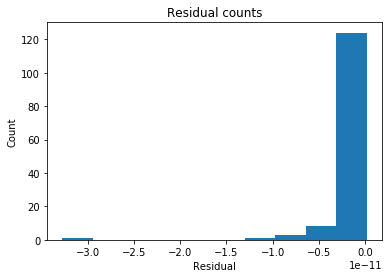

In [231]:
# Outliers or skewness in error 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

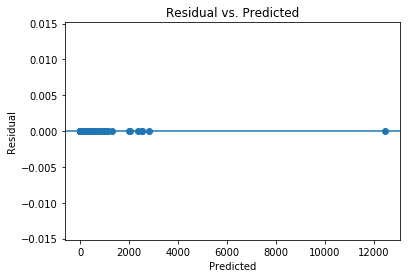

In [232]:
# The distribution of error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic
plt.scatter(predictions, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

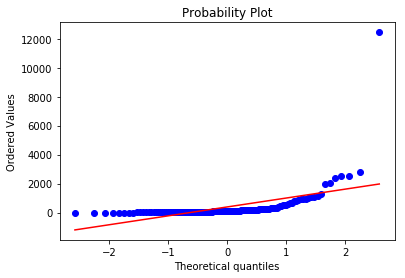

In [233]:
import numpy as np 
import pylab
import scipy.stats as stats

#measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(predictions, dist="norm", plot=pylab)
pylab.show()

<h1> Eliminated several high p-value features and tried different holdout ratio and none improved the overfitting problem. </h1>